# Example of using the predefined mechanics simulator, tasks, prompts, and analysis tools
This notebook shows how to use the runner to start an exploration with our predefined examples including saving the conversation and results. For an example how to define your own experiment and tools, see the notebook example_define_new_simulator_analysis.

In [1]:
import os
from sciexplorer import runner


In [ ]:
api_key="" # insert your OpenAI API key here
base_url=None # change this to use non-OpenAI models
model_name='gpt-5-2025-08-07'

In [3]:
# This is just a harmonic oscillator
simulator_init=dict(a = 0., b = -0.5, gamma=0.0, 
                    dt=0.001, solver_steps_per_timestep=10,) # passed as initial kwargs to the simulator
simulator = 'MysteryDoubleWellInit' # experimental simulator to use from simulators_file

# replace with your local path to the sciexplorer/examples folder
examples_path = '/Users/mnaegel/Documents/sciexplorer_framework/sciexplorer/examples'

# Experiment to explore
simulators_file="simulators/equations_of_motion" # file containing the simulators, as subpath of github_repo_path

tasks_file="tasks/tasks.md" # file containing the tasks for the agent, as subpath of github_repo_path
task = 'model_discovery' # Task to perform

add_to_agent_name = 'example_discovery' # additional string to add to the file name when saving results

system_prompts_file="prompts/system_prompts.md" # file containing the system prompts, as subpath of github_repo_path
system_prompt = 'reduced_gpt5_opt'  # name of system prompt in system_prompts_file
intermediate_prompts_file='prompts/intermediate_prompts.md' # file containing the intermediate prompts, as subpath of github_repo_path
intermediate_prompt= 'no_separate_tools_ask_answer'#'no_separate_tools'#'very_short'#'default' # intermediate prompt key
simulator_tools=['observe_evolution', 'observe_multiple_evolutions'] # tools that the experimental simulator provides to the agent
analyzer_file="analysis/analysis_eom" # file containing the analyzer tools, as subpath of github_repo_path
analyzer_tools="coding" # analysis toolbox specified in analyzer_file
save_to_file_agent='./temp_result' # folder to save the agent conversation to
separate_tool_calls = False # whether to combine tool calls and verbal reasoning in one response, or to separate them

run_kwargs = dict(
            final_response_key = "", # stop exploration if agent uses this key in the response, not used
            allow_multiple_tool_calls = True, # allow the agent to call multiple tools in one step
            keep_only_one_image = False, # keep only one image in the response, for limited models, not used
            max_tries_for_correct_tool_call = 5, # maximum number of tries to get a correct tool call from the agent
            max_steps = 5, max_tools = 20 # maximum number of steps and tools the agent can use in one run
            )

--Setting simulator tools: [<bound method MysteryDoubleWellInit.observe_evolution of <dynamic_import_equations_of_motion.MysteryDoubleWellInit object at 0x15f54f0b0>>, <bound method MysteryDoubleWellInit.observe_multiple_evolutions of <dynamic_import_equations_of_motion.MysteryDoubleWellInit object at 0x15f54f0b0>>]--
--Setting analysis tools: [<function approx_equal at 0x169e65da0>, <function plot_from_code at 0x169c11800>, <function execute_code at 0x16925df80>]--
--Running experiment--
Timeout for function calls set to: 30
SYSTEM: - Act as a computational physicist dedicated to thoroughly resolving the user's query through careful planning, hypothesis generation, and iterative verification.
- In your first message, create a comprehensive plan to solve the users query. Include an extensive list of candidate hypotheses.
- Initially, conduct at least 5 different experiments spanning the entire range of reasonable initial conditions. Make sure to cover also extreme cases. Then, create i

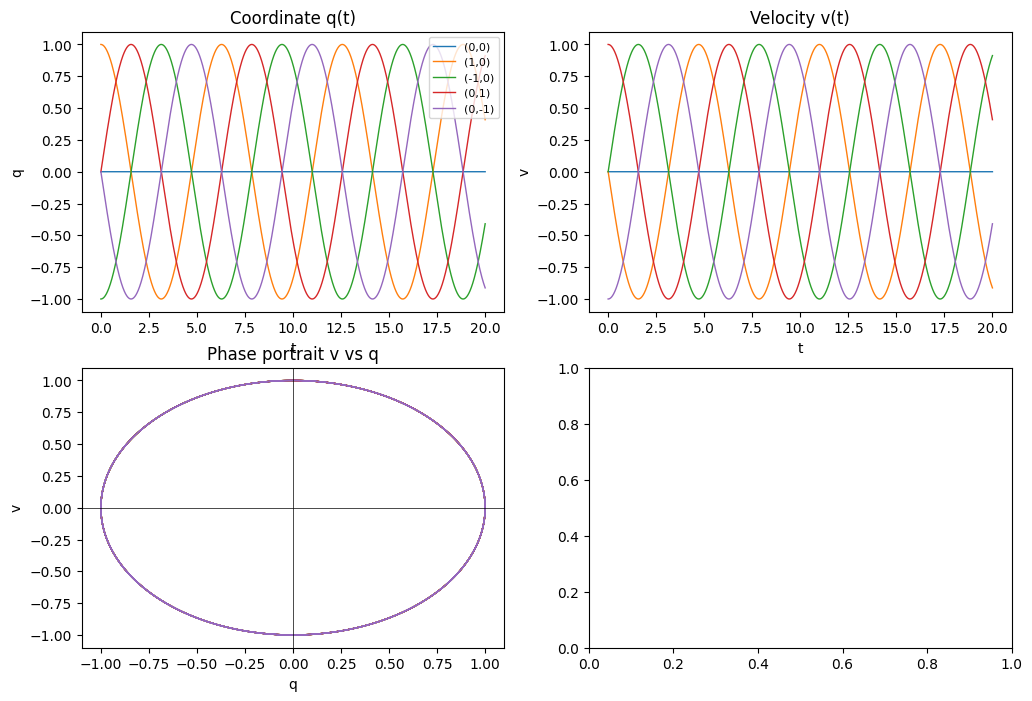

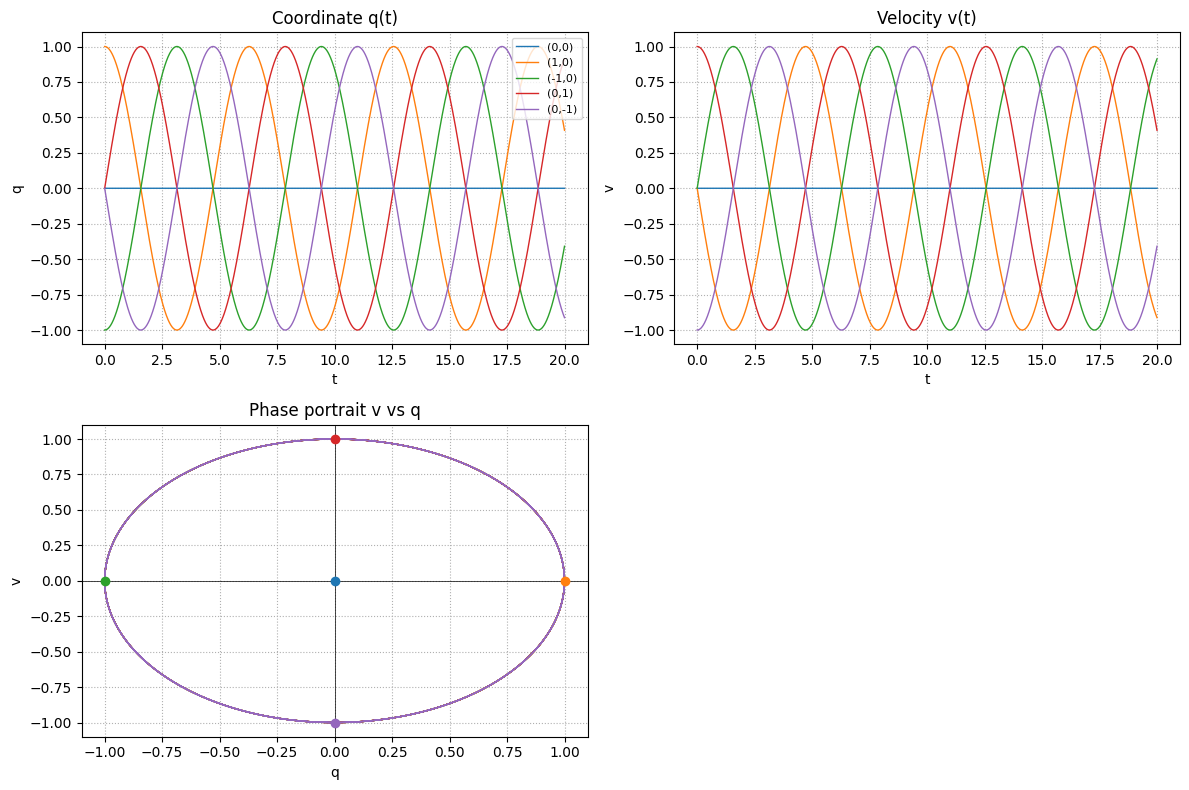

TOOL fc_68d555ef650c819081db1b26016ed6c30bdeab940d5b234b: Saved the following results in the format <result_label>: <result>:
exp1_plots_simple_image: Image data is provided later by the user.
USER: Here's the image exp1_plots_simple_image generated by the tool:
-- Image sent--
USER: 
 You potentially have up to 2 steps left and can call up to 17 tools. Keep solving the problem while following your system prompt. Make sure to answer the questions posed in the system prompt in your response.
ASSISTANT REASONING: **Analyzing harmonic oscillator behavior**

I’m observing the amplitude of q(t), which looks to be near 1 based on the plot that spans from -1 to 1. It starts at q=0 and reaches ±1, suggesting that ω equals 1. The velocity amplitude also seems to be 1. For a harmonic oscillator, with ω at 1 and initial conditions, v(t) should reflect that. When ω equals 1, the phase portrait appears circular, confirming that the relationship between q and v is harmonic.
ASSISTANT RESPONSE: What 

In [4]:
result,messages,model,simulator_object,_fields = runner.run(
            base_dir=examples_path,
            tasks_file=tasks_file,
            task=task,
            simulators_file=simulators_file,
            simulator=simulator,
            simulator_init=simulator_init,
            simulator_tools=simulator_tools,
            analyzer_file=analyzer_file,
            analyzer_tools=analyzer_tools,
            system_prompts_file=system_prompts_file,
            system_prompt=system_prompt,
            intermediate_prompts_file=intermediate_prompts_file,
            intermediate_prompt=intermediate_prompt,
            save_to_file=save_to_file_agent,
            api_key=api_key,
            base_url=base_url,
            model_name=model_name,
            run_kwargs=run_kwargs,
            random_exp_func=None, # only needed if initial random experiments are supplied to the agent
            plot_tool=None, # only needed if initial random experiments are supplied to the agent
            n_exps_to_run=0, # number of initial random experiments to run
            use_tools=True,  # Use tools in the agent run
            summarize_at_end=True,  # Summarize the results at the end of the run
            replace_message_function=None,
            separate_tool_calls=separate_tool_calls,
            response_api = True, # if True, use the response API instead of chat completions
            reasoning_level = "high", # can be 'low', 'medium', 'high'
            verbosity = "high", # can be 'low', 'medium', 'high'
            reasoning_summary = "auto", # provide summary of internal reasoning process
            timeout=30, # timeout for each tool call
        )

In [5]:
result

{'R2': Array(1., dtype=float32),
 'predicted_rhs': "def rhs(X:jax.Array, t:float) -> jax.Array:\n    '''Undamped harmonic oscillator with unit frequency: q'' + q = 0'''\n    q = X[0]\n    v = X[1]\n    return jnp.array([v, -q])",
 'R2_list': [Array(1., dtype=float32), Array(1., dtype=float32)],
 'error': None}

In [7]:
_fields.keys()

dict_keys(['exp1_tss', 'exp1_arrays', 'last_error', 'exp1_plots_simple_image', 'fit1_dt', 'fit1_theta', 'fit1_r2', 'fit1_mse', 'fit1_var', 'final_save_message'])